In [0]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import Word
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import nltk

nltk.download('wordnet')

import seaborn as sn
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def clean_str(string):
  
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

In [0]:
data = pd.read_csv('drive/My Drive/PFA/categ_dataset.csv', encoding='cp1252')
x = data['news'].tolist()
y = data['type'].tolist()

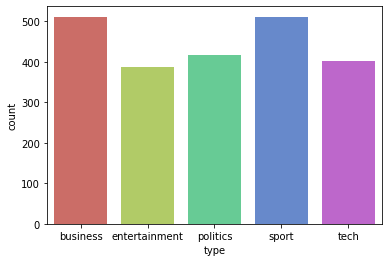

In [0]:
sn.countplot(x='type', data=data, palette='hls')

In [0]:
for index,value in enumerate(x):
    x[index] = ' '.join([Word(word).lemmatize() for word in clean_str(value).split()])

In [0]:
vect = TfidfVectorizer(stop_words='english',min_df=2)
X = vect.fit_transform(x)
Y = np.array(y)

In [0]:
print("no of features extracted:",X.shape[1])

no of features extracted: 14788


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

print("train size:", X_train.shape)
print("test size:", X_test.shape)

train size: (1780, 14788)
test size: (445, 14788)


In [0]:
model = RandomForestClassifier(n_estimators=300, max_depth=150,n_jobs=1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
y_pred = model.predict(X_test)

In [0]:
acc = accuracy_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:

print("\nAccuracy: ",acc)


Accuracy:  0.9662921348314607


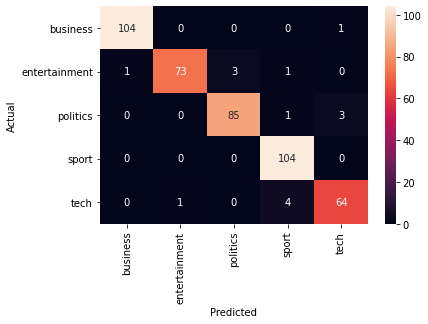

In [0]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

In [0]:
def check_news_type(news_article):
    news_article = [' '.join([Word(word).lemmatize() for word in clean_str(news_article).split()])]
    features = vect.transform(news_article)
    return str(model.predict(features)[0])

In [0]:

article = " ATHENS (Reuters) - Cyprus on Wednesday said it would try to help defuse a crisis in neighboring Lebanon after Prime Minister Saad al-Hariri made an unexpected stopover on the island on Tuesday night. Cyprus announced the move shortly after Hariri shelved a decision to resign at the request of Lebanon s President Michel Aoun, easing an impasse that had stirred tensions around the Middle East. Hariri met Cypriot President Nicos Anastasiades at Larnaca airport for about 45 minutes late on Tuesday on his way back to Lebanon, his first visit home since he unexpectedly announced on Nov. 4 he would resign in a broadcast from Saudi Arabia.   Our common objective is stability in Lebanon, stability in our area. Within this context... the President of the Republic will undertake some initiatives precisely to promote this objective; stability in Lebanon,  Cypriot government spokesman Nikos Christodoulides said. Christodoulides said Anastasiades s initiatives would be directed toward European Union and neighboring states, but was not more specific.  Cyprus is uniquely placed, as a member state of the European Union which also maintains excellent relations with all its neighbors. That (position) is broadly recognized and would allow us to work to achieve stability in Lebanon,  he said. The island, perched on the edge of the Middle East, is broadly considered a neutral safe haven in an otherwise volatile region. It took in thousands of Lebanese fleeing civil war in the 1970s and successfully mediated an end to a 39-day siege of the Church of the Nativity in Bethlehem between Israeli forces and suspected Palestinian militants. On Tuesday Anastasiades received an invitation to visit Saudi Arabia, Christodoulides said. It was not immediately clear if it was connected to the crisis, though Cypriot government officials told Reuters the visit had been planned for some time. "

In [0]:
check_news_type(article)

'politics'

In [0]:
#saving model to the disk
"""import pickle

model_file = 'drive/My Drive/PFA/categ_model.sav'
pickle.dump(model,open(model_file,'wb'))

vect_file = 'drive/My Drive/PFA/categ_vect.sav'
pickle.dump(vect,open(vect_file,'wb'))"""

In [0]:
!unzip -uq "drive/My Drive/PFA/PFA_data.zip" -d "drive/My Drive/PFA"

url = 'drive/My Drive/PFA/PFA_data.csv'

frame  = pd.read_csv(url)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
frame.drop(frame.filter(regex="Unname"),axis=1, inplace=True)
frame.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake


In [0]:
frame["text_cat"] = [check_news_type(r) for r in frame["text"]] 

In [0]:
frame.to_csv('drive/My Drive/PFA/PFA_data_cat.csv', index=False)

In [0]:
url = 'drive/My Drive/PFA/PFA_data_cat.csv'

frame  = pd.read_csv(url)

In [0]:
frame.head()

,title,text,label,text_cat
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake,entertainment
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake,politics
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake,politics
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake,tech
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake,politics


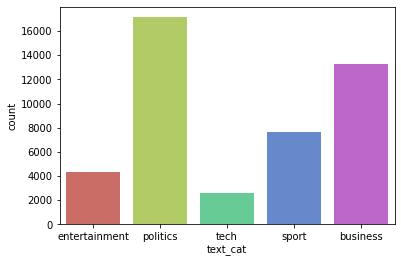

In [0]:
import seaborn as sb

sb.countplot(x='text_cat', data=frame, palette='hls')


In [0]:
entertainment = frame.where(frame['text_cat'] == 'entertainment')

In [0]:
entertainment.head()

,title,text,label,text_cat
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake,entertainment
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [0]:
entertainment = entertainment.dropna()

In [0]:
len(entertainment)

4305

In [0]:
entertainment.head()

,title,text,label,text_cat
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake,entertainment
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,fake,entertainment
20,"In A Heartless Rebuke To Victims, Trump Invit...",It almost seems like Donald Trump is trolling ...,fake,entertainment
28,Liberal Group Trolls Trump At Roy Moore Rally...,Donald Trump held a rally for Alabama Senate c...,fake,entertainment
30,"BREAKING: Cop Finally Gets His Due, Walter Sc...","In America, we have been having a conversation...",fake,entertainment


In [0]:
entertainment = entertainment.reset_index(drop=True)

In [0]:
entertainment.drop(entertainment.filter(regex="text_cat"),axis=1, inplace=True)

In [0]:
entertainment.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake
1,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,fake
2,"In A Heartless Rebuke To Victims, Trump Invit...",It almost seems like Donald Trump is trolling ...,fake
3,Liberal Group Trolls Trump At Roy Moore Rally...,Donald Trump held a rally for Alabama Senate c...,fake
4,"BREAKING: Cop Finally Gets His Due, Walter Sc...","In America, we have been having a conversation...",fake


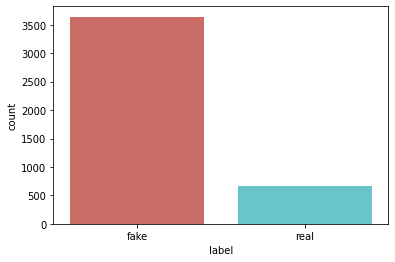

In [0]:
sb.countplot(x='label', data=entertainment, palette='hls')

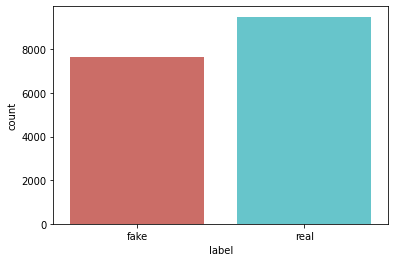

In [0]:
politics = frame.where(frame['text_cat'] == 'politics')
politics = politics.dropna()
politics = politics.reset_index(drop=True)
politics.drop(politics.filter(regex="text_cat"),axis=1, inplace=True)
sb.countplot(x='label', data=politics, palette='hls')

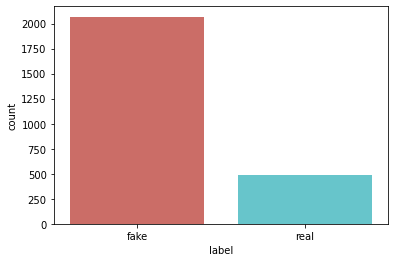

In [0]:
tech = frame.where(frame['text_cat'] == 'tech')
tech = tech.dropna()
tech = tech.reset_index(drop=True)
tech.drop(tech.filter(regex="text_cat"),axis=1, inplace=True)
sb.countplot(x='label', data=tech, palette='hls')

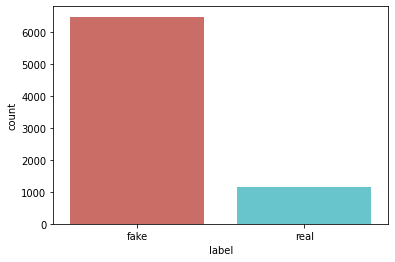

In [0]:
sport = frame.where(frame['text_cat'] == 'sport')
sport = sport.dropna()
sport = sport.reset_index(drop=True)
sport.drop(sport.filter(regex="text_cat"),axis=1, inplace=True)
sb.countplot(x='label', data=sport, palette='hls')

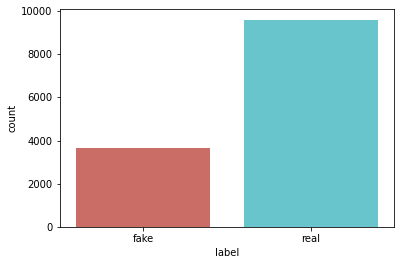

In [0]:
business = frame.where(frame['text_cat'] == 'business')
business = business.dropna()
business = business.reset_index(drop=True)
business.drop(business.filter(regex="text_cat"),axis=1, inplace=True)
sb.countplot(x='label', data=business, palette='hls')